Ejercicio 1


11501568/11490434 [==============================] - 0s 0us/step


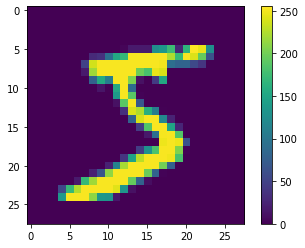

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2607 - accuracy: 0.9247
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1134 - accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0770 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0583 - accuracy: 0.9816
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0454 - accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0355 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0287 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0239 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0174 - accuracy: 0.9948
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.015

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image as preprocessing_img

#los imports y load data
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# los numeros del 0 al 9
class_names = ['zero', 'one', 'two', 'three', 'four',
               'five', 'six', 'seven', 'eight', 'nine']

# Comprobando que si importamos todo bien
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Normalizando los datos
train_images = train_images / 255.0
test_images = test_images / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

Resultado de la predicción:  [3.9943223e-19 3.3447203e-09 9.9999976e-01 2.3085296e-07 8.1287297e-09
 1.1874300e-14 7.4341498e-15 8.8521265e-12 5.7925140e-12 1.0637196e-21]
Label predicha:  two
Label correspondiente:  two


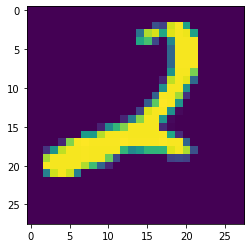

In [17]:
predictions = probability_model.predict(test_images)

index = 6528  #@param {type: "slider", min: 0, max: 9999}

print('Resultado de la predicción: ',  predictions[index])

print('Label predicha: ', class_names[np.argmax(predictions[index])])

print('Label correspondiente: ', class_names[test_labels[index]])

plt.imshow(test_images[index])

Ejercicio 2

In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D ,MaxPool2D, Flatten
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape(X_train.shape[0],32, 32, 3)
X_test = X_test.reshape(X_test.shape[0],32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train  /= 255
X_test /= 255

Nrows = X_test.shape[0]

170508288/170498071 [==============================] - 3s 0us/step


In [8]:
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

model = Sequential()
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding ='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding ='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 50)        1400      
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 75)        33825     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 75)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 75)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 125)       84500     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 125)        0         
 2D)                                                  

In [9]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.fit(X_train, Y_train, batch_size=128, epochs=1, validation_data=(X_test,Y_test))
model.save('modelo.h5')

391/391 [==============================] - 587s 1s/step - loss: 1.6059 - accuracy: 0.4119 - val_loss: 1.1824 - val_accuracy: 0.5790


In [10]:
import tensorflow.keras as keras
my_model = keras.models.load_model('modelo.h5')

import numpy as np
import matplotlib.pyplot as plt

Im_Num = np.random.randint(Nrows)

predictions = my_model.predict(X_test)
prediction_test = np.argmax(predictions[Im_Num])

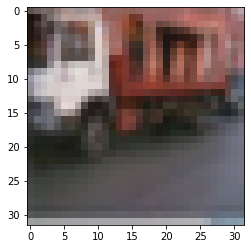

Fail


In [11]:
plt.imshow(X_test[Im_Num].reshape(32,32,3))
plt.show()

if (y_test[Im_Num] == prediction_test):
  print("Correct")
else:
  print("Fail")

Ejercicio 3

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness

n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

model = Sequential()
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding ='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding ='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

print(model.summary())


model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.fit(datagen.flow(X_train, Y_train, batch_size=128, seed=2, shuffle=False), epochs=1, validation_data=(X_test,Y_test))
model.save('modelo_augmented.h5')


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 50)        1400      
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 75)        33825     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 75)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 75)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 125)       84500     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 125)        0         
 2D)                                                  

In [14]:
import tensorflow.keras as keras
my_model = keras.models.load_model('modelo_augmented.h5')

import numpy as np
import matplotlib.pyplot as plt

Im_Num = np.random.randint(Nrows)

predictions = my_model.predict(X_test)
prediction_test = np.argmax(predictions[Im_Num])

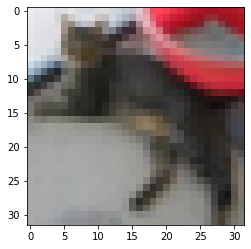

Dog
Fail
Should be:
Cat


In [15]:
plt.imshow(X_test[Im_Num].reshape(32,32,3))
plt.show()

label = ['Airplane', "Automobile", 'Bird', 'Cat', "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

print(label[np.argmax(predictions[Im_Num])])
if (y_test[Im_Num] == prediction_test):
  print("Correct")
else:
  print("Fail")
  print("Should be:")
  print(label[np.argmax(Y_test[Im_Num])])